### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


##------Machine Learning models----
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score


##-------Deep Learning Models---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Bidirectional, LSTM, GRU, Activation, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



In [ ]:
#Importing Data
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=30000, maxlen=50, test_split=0.3)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
X_train.shape

(1395,)

In [ ]:
X_test.shape

(599,)

In [ ]:
pd.Series(y_train).nunique() ### 46 unique labels are there in the training dataset

31

In [ ]:
len(max(X_train,key=len)) #Maximum size

49

In [ ]:
len(X_train[0])

31

In [ ]:
#Padding the data
X_train_pad = pad_sequences(X_train, padding='post')
X_test_pad = pad_sequences(X_test, padding='post')

In [ ]:
y_data = np.concatenate([y_train, y_test])

In [ ]:
y_data = to_categorical(y_data)

In [ ]:
y_data.shape

(1994, 46)

In [ ]:
y_train_en = y_data[:len(y_train)]

y_train_en.shape

(1395, 46)

In [ ]:
y_test_en = y_data[len(y_train):]

y_test_en.shape

(599, 46)

### Machine Learning models

In [ ]:
def metrics(y_true, y_pred):
  print('Accuracy Score:', round(accuracy_score(y_true, y_pred),2))
  print('Precision Score:', round(precision_score(y_true, y_pred, average='weighted'),2))
  print('Recall Score:', round(recall_score(y_true, y_pred, average='weighted'),2))

In [ ]:
def ml_predictions(model):
  model.fit(X_train_pad, y_train)
  train_pred = model.predict(X_train_pad)###Train prediction
  test_pred = model.predict(X_test_pad)##Test Prediction
  actual = [y_train, y_test]
  pred = [train_pred, test_pred]
  data = ['Train', 'Test']
  for i in range(2):
    print(data[i])
    metrics(actual[i], pred[i])
    print('\n')

In [ ]:
###Logistic Regression
log_rr = LogisticRegression(max_iter=100)
print('LogisticRegression')
ml_predictions(log_rr)

LogisticRegression
Train
Accuracy Score: 0.5
Precision Score: 0.53
Recall Score: 0.5


Test
Accuracy Score: 0.4
Precision Score: 0.43
Recall Score: 0.4




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sampl

In [ ]:
#---# KNN
knn = KNeighborsClassifier()
print('KNN')
ml_predictions(knn)

KNN
Train
Accuracy Score: 0.65
Precision Score: 0.63
Recall Score: 0.65


Test
Accuracy Score: 0.57
Precision Score: 0.5
Recall Score: 0.57




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#---#Naive Bayes
nb = MultinomialNB()
print('nb')
ml_predictions(nb)

nb
Train
Accuracy Score: 0.22
Precision Score: 0.53
Recall Score: 0.22


Test
Accuracy Score: 0.15
Precision Score: 0.47
Recall Score: 0.15




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#---#Decision Tree
dtree = DecisionTreeClassifier()
print('Decision Tree')
ml_predictions(dtree)

Decision Tree
Train
Accuracy Score: 0.98
Precision Score: 0.98
Recall Score: 0.98


Test
Accuracy Score: 0.63
Precision Score: 0.63
Recall Score: 0.63




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#---# Extra Tree Classifier
extra_tree = ExtraTreeClassifier()
print('Extra Tree Classifier')
ml_predictions(extra_tree)

Extra Tree Classifier
Train
Accuracy Score: 0.98
Precision Score: 0.98
Recall Score: 0.98


Test
Accuracy Score: 0.5
Precision Score: 0.51
Recall Score: 0.5




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#---#Bagging Classifier
bag = BaggingClassifier()
print('Bagging Classifier')
ml_predictions(bag)

Bagging Classifier
Train
Accuracy Score: 0.97
Precision Score: 0.97
Recall Score: 0.97


Test
Accuracy Score: 0.69
Precision Score: 0.65
Recall Score: 0.69




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#--#Random Forest
rf = RandomForestClassifier()
print('Random Forest')
ml_predictions(rf)

Random Forest
Train
Accuracy Score: 0.98
Precision Score: 0.98
Recall Score: 0.98


Test
Accuracy Score: 0.71
Precision Score: 0.7
Recall Score: 0.71




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#--# Ada Boost 
ada = AdaBoostClassifier()
print('Ada Boost Classifier')
ml_predictions(ada)

Ada Boost Classifier
Train
Accuracy Score: 0.57
Precision Score: 0.45
Recall Score: 0.57


Test
Accuracy Score: 0.56
Precision Score: 0.43
Recall Score: 0.56




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#----# Gradient Boost
grad = GradientBoostingClassifier()
print('Gradient Boost')
ml_predictions(grad)

Gradient Boost
Train
Accuracy Score: 0.92
Precision Score: 0.93
Recall Score: 0.92


Test
Accuracy Score: 0.67
Precision Score: 0.64
Recall Score: 0.67




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#----# LGBM 
lgbm = LGBMClassifier()
print('Light GBM')
ml_predictions(lgbm)

Light GBM
Train
Accuracy Score: 0.98
Precision Score: 0.98
Recall Score: 0.98


Test
Accuracy Score: 0.72
Precision Score: 0.69
Recall Score: 0.72




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## XGBoost
xgb = XGBClassifier()
print('XGBoost')
ml_predictions(xgb)

XGBoost
Train
Accuracy Score: 0.92
Precision Score: 0.92
Recall Score: 0.92


Test
Accuracy Score: 0.72
Precision Score: 0.7
Recall Score: 0.72




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Deep Learning 

In [ ]:
X_train_pad.shape

(4180, 99)

In [ ]:
#ANN
def simple_ann(optimizer='adam'):
  model = Sequential()
  model.add(Dense(100, input_dim=49, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(46, activation='softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

  return model

In [ ]:
X_test_pad.shape

(599, 49)

In [ ]:
X_train_pad_re = X_train_pad.reshape(1395,49,1)
X_test_pad_re = X_test_pad.reshape(599,49,1)

In [ ]:
def dl_predictions(model, X_train_pad=X_train_pad, X_test_pad=X_test_pad, no_callback=True, early_stop=None):
  if no_callback:
    model.fit(X_train_pad, y_train_en, validation_data = (X_test_pad, y_test_en), epochs=100, batch_size=32, verbose=0)
  
  elif no_callback==False:
    print('CALL Back.....')
    model.fit(X_train_pad, y_train_en, validation_data = (X_test_pad, y_test_en), epochs=100, batch_size=32, verbose=0, callbacks=[early_stop])

  loss = pd.DataFrame(model.history.history)
  #--Loss--##
  plt.figure(figsize=(12,8))
  plt.plot(loss[['loss', 'val_loss']])
  plt.title('Loss vs Validation Loss')
  plt.show()

  ##--Accuracy--##
  plt.figure(figsize=(12,8))
  plt.plot(loss[['accuracy', 'val_accuracy']])
  plt.title('Accuracy vs Validation accuracy')
  plt.show()
  
  train_pred = model.predict_classes(X_train_pad)###Train prediction
  test_pred = model.predict_classes(X_test_pad)##Test Prediction
  actual = [y_train, y_test]
  pred = [train_pred, test_pred]
  data = ['Train', 'Test']
  for i in range(2):
    print(data[i])
    metrics(actual[i], pred[i])
    print('\n')

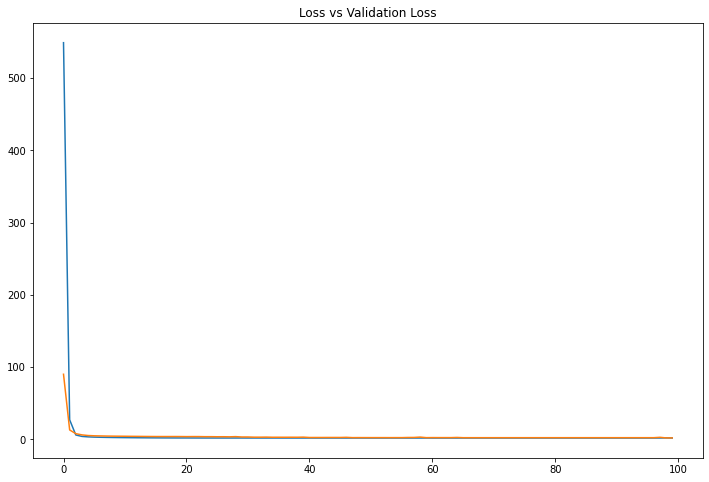

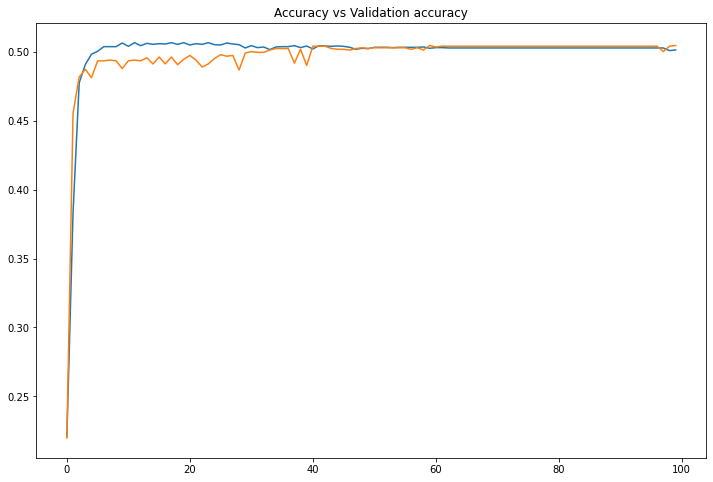

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.5
Precision Score: 0.51
Recall Score: 0.5


Test
Accuracy Score: 0.5
Precision Score: 0.26
Recall Score: 0.5




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ann_model = simple_ann()

dl_predictions(ann_model)

In [ ]:
def vanilla_run(layer_name):
  model = Sequential()
  model.add(layer_name(50, input_shape=(49,1), return_sequences=True))
  model.add(layer_name(46))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  model.summary()
  return model

In [ ]:
model = vanilla_run(SimpleRNN)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 49, 50)            2600      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 46)                4462      
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 7,062
Trainable params: 7,062
Non-trainable params: 0
_________________________________________________________________


Simple RNN


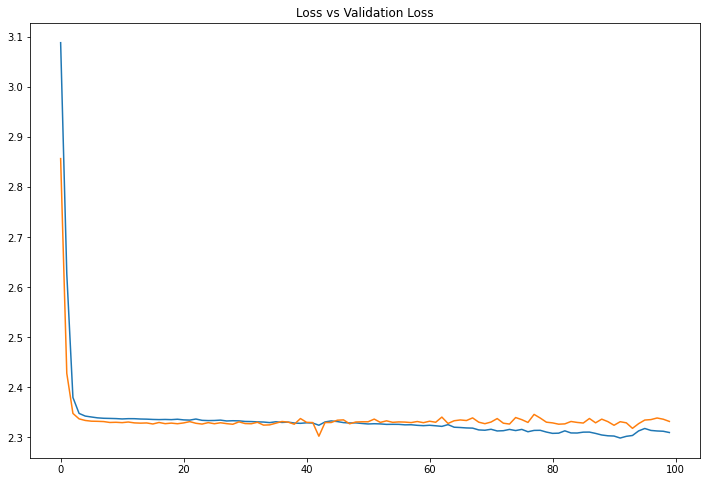

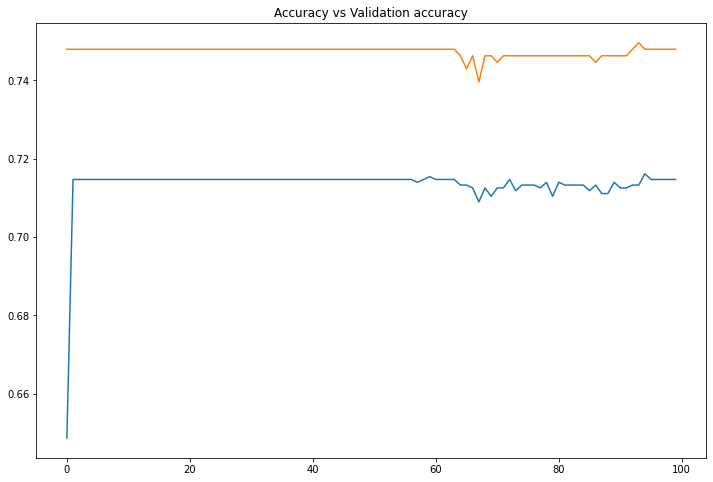

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.71
Precision Score: 0.51
Recall Score: 0.71


Test
Accuracy Score: 0.75
Precision Score: 0.56
Recall Score: 0.75




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Simple RNN')
dl_predictions(model, X_train_pad_re, X_test_pad_re)

In [ ]:
model = vanilla_run(LSTM)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 49, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 46)                17848     
_________________________________________________________________
activation_2 (Activation)    (None, 46)                0         
Total params: 28,248
Trainable params: 28,248
Non-trainable params: 0
_________________________________________________________________


LSTM


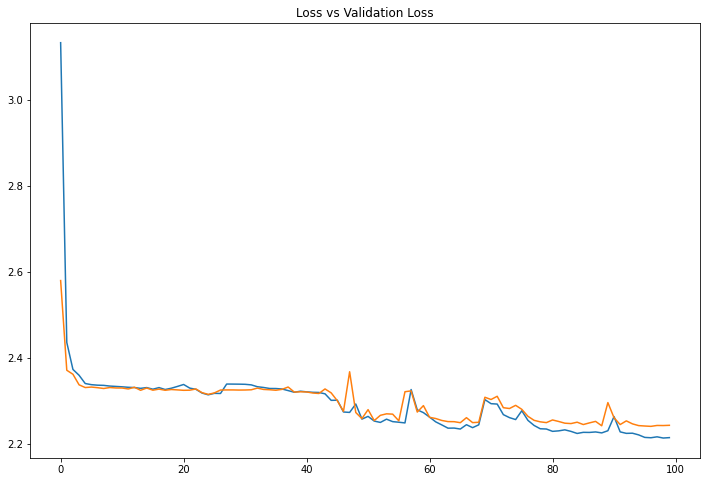

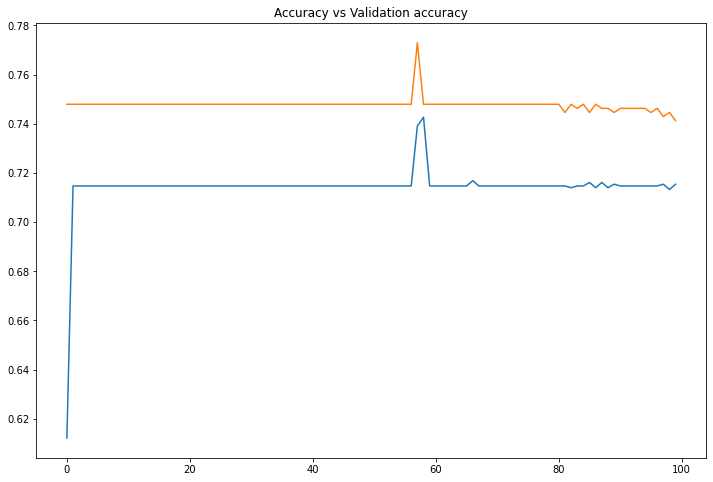

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.72
Precision Score: 0.56
Recall Score: 0.72


Test
Accuracy Score: 0.74
Precision Score: 0.6
Recall Score: 0.74




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('LSTM')
dl_predictions(model, X_train_pad_re, X_test_pad_re)

In [ ]:
model = vanilla_run(GRU)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 49, 50)            7950      
_________________________________________________________________
gru_3 (GRU)                  (None, 46)                13524     
_________________________________________________________________
activation_4 (Activation)    (None, 46)                0         
Total params: 21,474
Trainable params: 21,474
Non-trainable params: 0
_________________________________________________________________


GRU


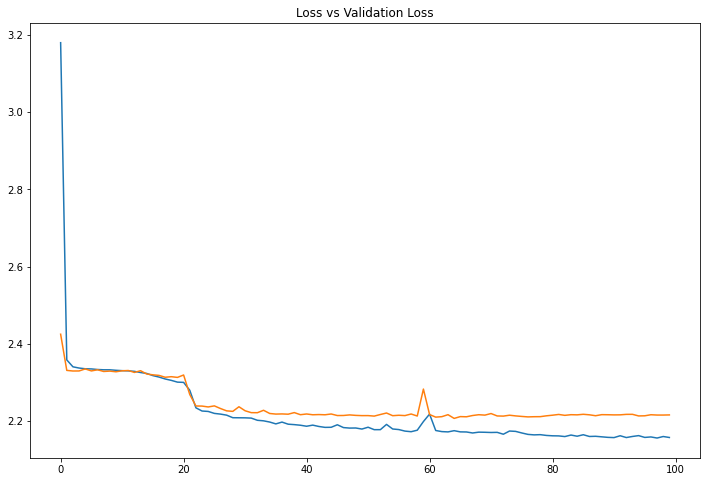

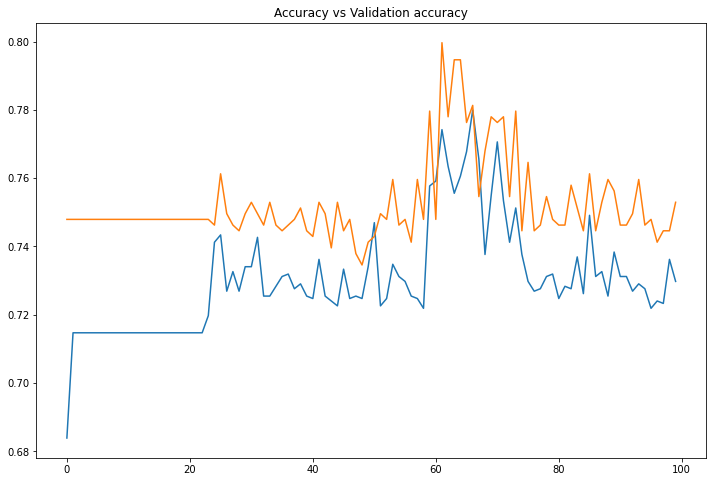

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.74
Precision Score: 0.63
Recall Score: 0.74


Test
Accuracy Score: 0.75
Precision Score: 0.65
Recall Score: 0.75




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('GRU')
dl_predictions(model, X_train_pad_re, X_test_pad_re)

### Stacked Model

In [ ]:
def stacked_run(layer_name):
  model = Sequential()
  model.add(layer_name(50, input_shape=(49,1), return_sequences=True))
  model.add(layer_name(50, return_sequences=True))
  model.add(layer_name(46))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  model.summary()
  return model

In [ ]:
stack_rnn = stacked_run(SimpleRNN)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 49, 50)            2600      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 49, 50)            5050      
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 46)                4462      
_________________________________________________________________
activation_6 (Activation)    (None, 46)                0         
Total params: 12,112
Trainable params: 12,112
Non-trainable params: 0
_________________________________________________________________


Stacked_RNN


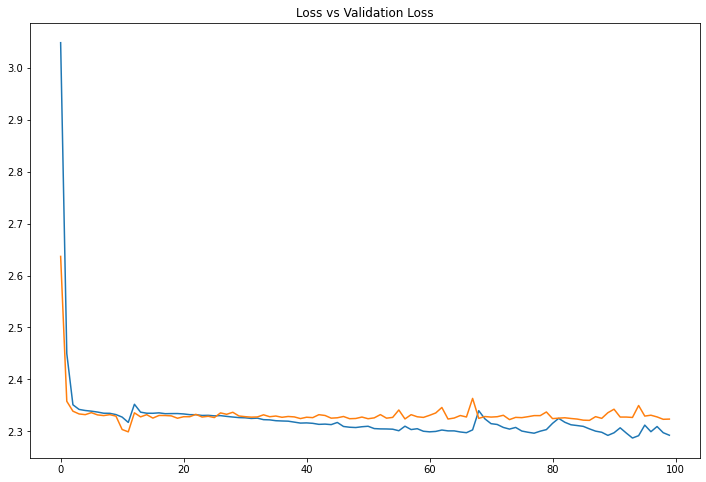

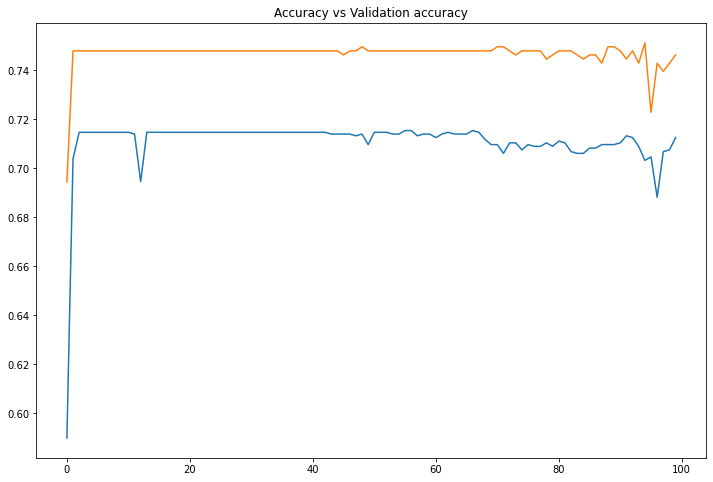

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.71
Precision Score: 0.53
Recall Score: 0.71


Test
Accuracy Score: 0.75
Precision Score: 0.61
Recall Score: 0.75




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Stacked_RNN')
dl_predictions(stack_rnn, X_train_pad_re, X_test_pad_re)

In [ ]:
stack_lstm = stacked_run(LSTM)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 49, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 49, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 46)                17848     
_________________________________________________________________
activation_7 (Activation)    (None, 46)                0         
Total params: 48,448
Trainable params: 48,448
Non-trainable params: 0
_________________________________________________________________


Stacked_LSTM


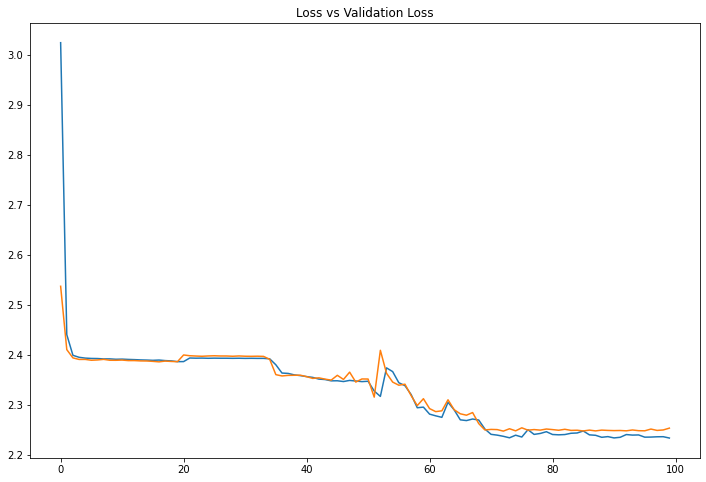

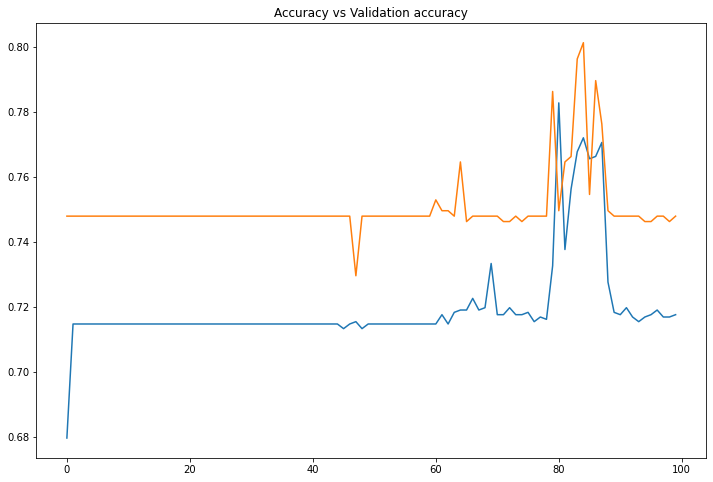

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.72
Precision Score: 0.53
Recall Score: 0.72


Test
Accuracy Score: 0.75
Precision Score: 0.58
Recall Score: 0.75




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Stacked_LSTM')
dl_predictions(stack_lstm, X_train_pad_re, X_test_pad_re)

In [ ]:
stack_gru = stacked_run(GRU)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 49, 50)            7950      
_________________________________________________________________
gru_5 (GRU)                  (None, 49, 50)            15300     
_________________________________________________________________
gru_6 (GRU)                  (None, 46)                13524     
_________________________________________________________________
activation_8 (Activation)    (None, 46)                0         
Total params: 36,774
Trainable params: 36,774
Non-trainable params: 0
_________________________________________________________________


Stacked_GRU


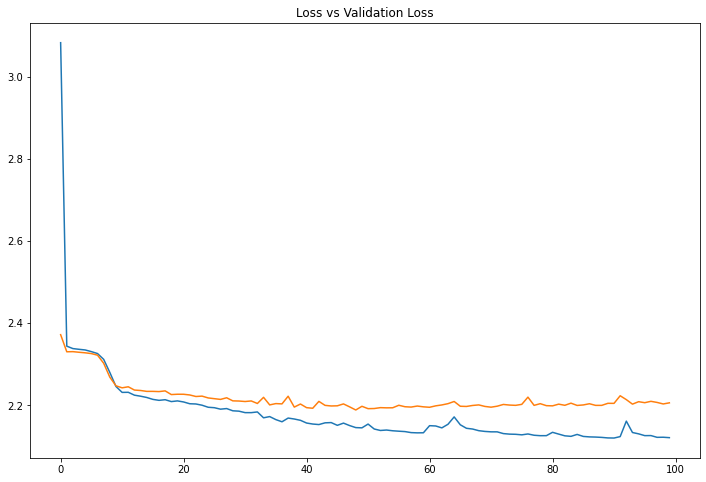

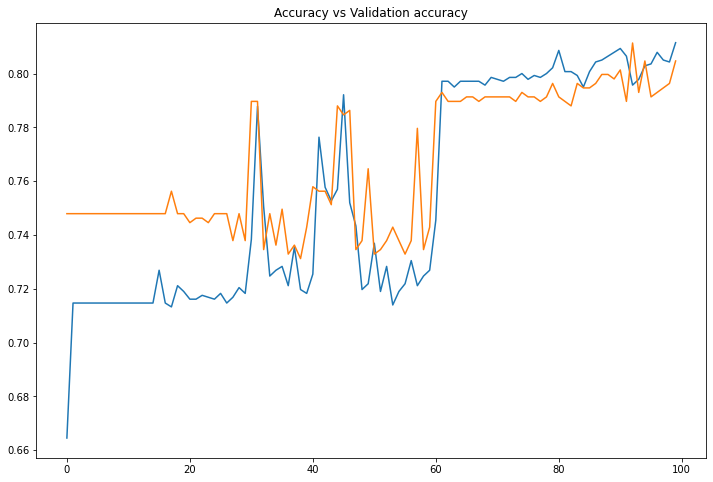

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.81
Precision Score: 0.76
Recall Score: 0.81


Test
Accuracy Score: 0.8
Precision Score: 0.76
Recall Score: 0.8




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Stacked_GRU')
dl_predictions(stack_gru, X_train_pad_re, X_test_pad_re)

## Bidirectional Model

In [ ]:
def bidirectional_model(layer_name):
  model = Sequential()
  model.add((layer_name(50, input_shape=(49,1), return_sequences=True)))
  model.add(Bidirectional(layer_name(50, return_sequences=False)))
  model.add(Dense(46, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  model.summary()
  return model

In [ ]:
bidirect_rnn = bidirectional_model(SimpleRNN)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_22 (SimpleRNN)    (None, 49, 50)            2600      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 49, 100)           10100     
_________________________________________________________________
simple_rnn_24 (SimpleRNN)    (None, 46)                6762      
_________________________________________________________________
activation_11 (Activation)   (None, 46)                0         
Total params: 19,462
Trainable params: 19,462
Non-trainable params: 0
_________________________________________________________________


Bidirectional RNN


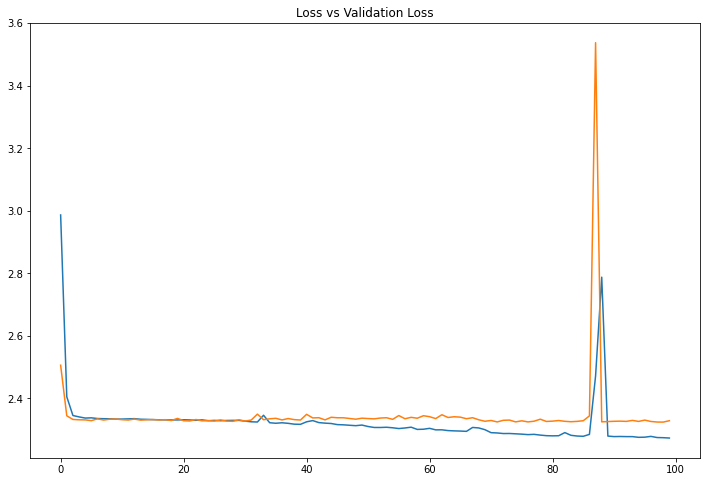

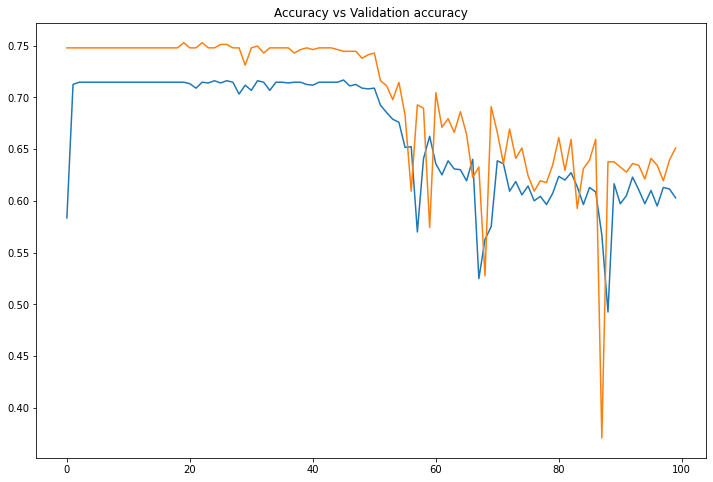

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.61
Precision Score: 0.56
Recall Score: 0.61


Test
Accuracy Score: 0.65
Precision Score: 0.61
Recall Score: 0.65




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Bidirectional RNN')
dl_predictions(bidirect_rnn, X_train_pad_re, X_test_pad_re)

In [ ]:
bidirect_ltm = bidirectional_model(LSTM)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 49, 50)            10400     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 49, 100)           40400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 46)                27048     
_________________________________________________________________
activation_12 (Activation)   (None, 46)                0         
Total params: 77,848
Trainable params: 77,848
Non-trainable params: 0
_________________________________________________________________


Bidirectional LSTM


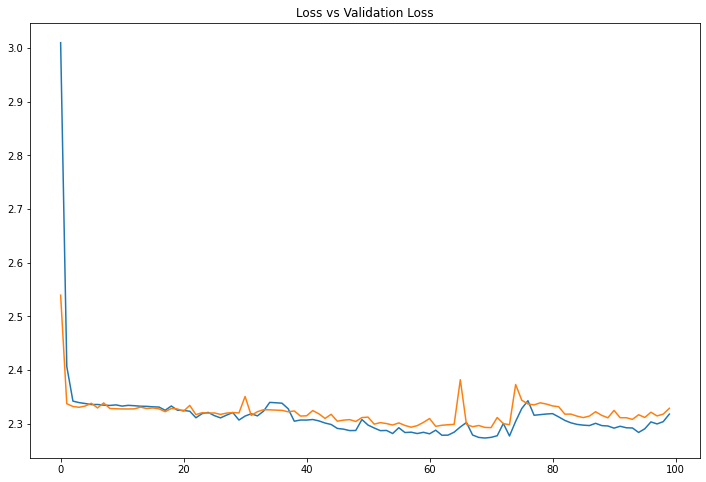

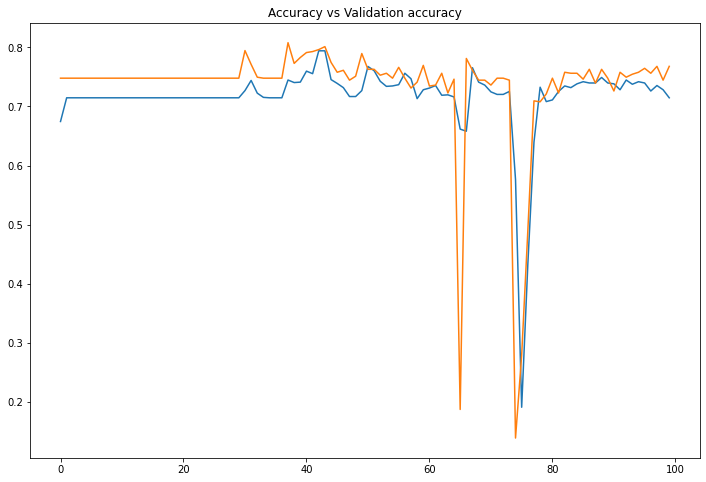

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.73
Precision Score: 0.59
Recall Score: 0.73


Test
Accuracy Score: 0.77
Precision Score: 0.65
Recall Score: 0.77




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Bidirectional LSTM')
dl_predictions(bidirect_ltm, X_train_pad_re, X_test_pad_re)

In [ ]:
bidirect_gru = bidirectional_model(GRU)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_21 (GRU)                 (None, 49, 50)            7950      
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 49, 100)           30600     
_________________________________________________________________
flatten (Flatten)            (None, 4900)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                225446    
Total params: 263,996
Trainable params: 263,996
Non-trainable params: 0
_________________________________________________________________


Bidirectional GRU


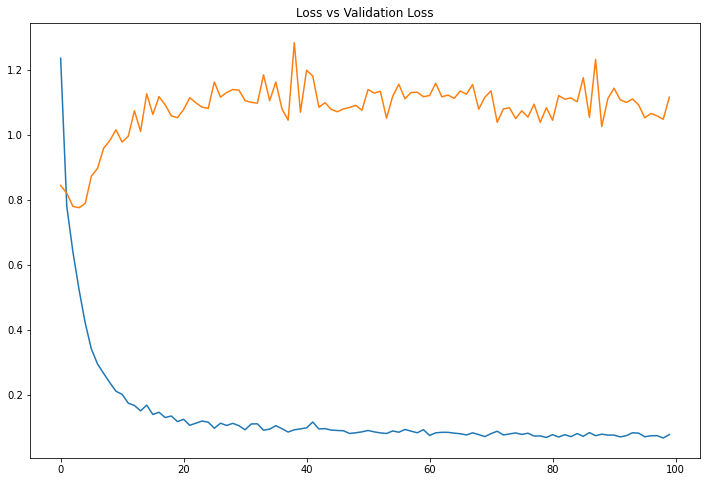

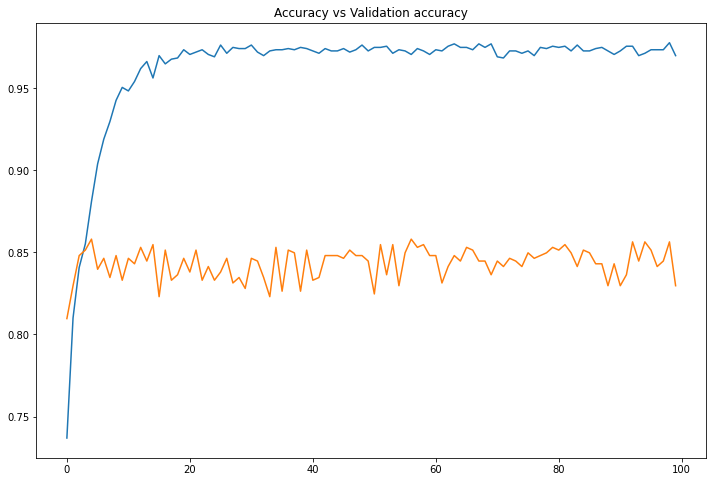

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.98
Precision Score: 0.98
Recall Score: 0.98


Test
Accuracy Score: 0.83
Precision Score: 0.82
Recall Score: 0.83




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Bidirectional GRU')
dl_predictions(bidirect_gru, X_train_pad_re, X_test_pad_re)

### Call Backs method

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min')

In [ ]:
bidirect_gru = bidirectional_model(GRU)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, 49, 50)            7950      
_________________________________________________________________
bidirectional_8 (Bidirection (None, 49, 100)           30600     
_________________________________________________________________
gru_15 (GRU)                 (None, 46)                20424     
_________________________________________________________________
activation_15 (Activation)   (None, 46)                0         
Total params: 58,974
Trainable params: 58,974
Non-trainable params: 0
_________________________________________________________________


CALL Back.....


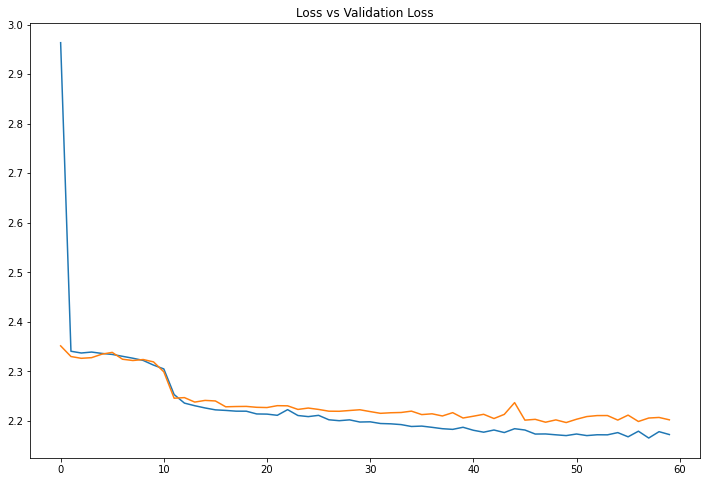

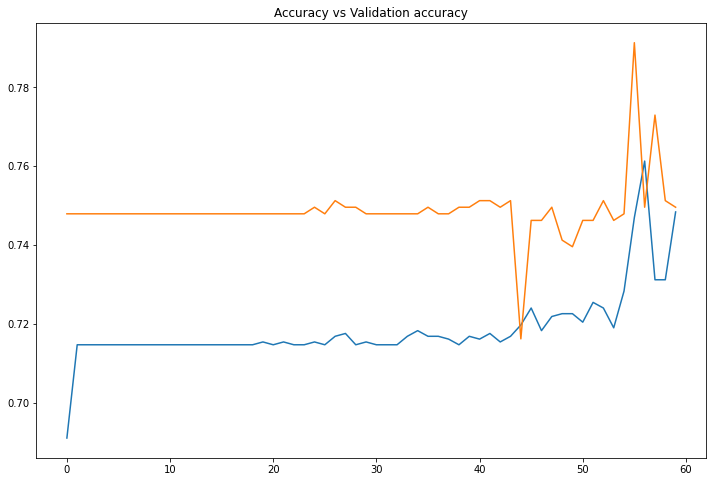

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.72
Precision Score: 0.62
Recall Score: 0.72


Test
Accuracy Score: 0.75
Precision Score: 0.62
Recall Score: 0.75




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dl_predictions(bidirect_gru, X_train_pad_re, X_test_pad_re, no_callback=False, early_stop=early_stop)

In [ ]:
# halve learning rate when validation loss has not reduced for more than 5 epochs
callbacks = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 5)
bidirect_gru = bidirectional_model(GRU)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_16 (GRU)                 (None, 49, 50)            7950      
_________________________________________________________________
bidirectional_9 (Bidirection (None, 49, 100)           30600     
_________________________________________________________________
gru_18 (GRU)                 (None, 46)                20424     
_________________________________________________________________
activation_16 (Activation)   (None, 46)                0         
Total params: 58,974
Trainable params: 58,974
Non-trainable params: 0
_________________________________________________________________


CALL Back.....


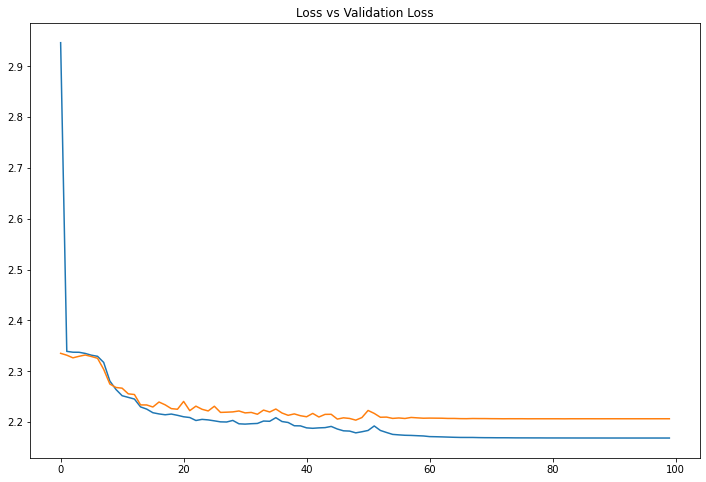

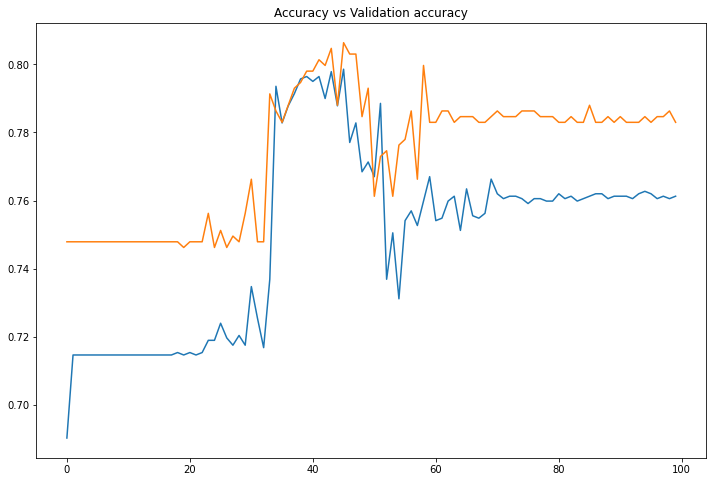

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Train
Accuracy Score: 0.76
Precision Score: 0.65
Recall Score: 0.76


Test
Accuracy Score: 0.78
Precision Score: 0.68
Recall Score: 0.78




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dl_predictions(bidirect_gru, X_train_pad_re, X_test_pad_re, no_callback=False, early_stop=callbacks)

#### Best Hyperparameter Search

In [ ]:
#-----------Searching Model--------------#
def search_model(opti='adam', lstm = True):
  model = Sequential()
  if LSTM:
    model.add(LSTM(50, input_shape=(49,1), return_sequences=True))
    model.add(LSTM(50, return_sequences=False))
  else:
    model.add(GRU(50, input_shape=(49,1), return_sequences=True))
    model.add(GRU(50, return_sequences=False))
  model.add(Dense(46))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=opti, metrics = ['accuracy'])
  return model

In [ ]:
model = KerasClassifier(build_fn = search_model, epochs = 50, batch_size = 32, verbose = 0)

In [ ]:
# set k = 5
results = cross_val_score(model, X_train_pad_re, y_train_en, cv = 5)

In [ ]:
# print out results
# in most cases, average accuracy and standard deviation are meaningful metrics
print('Cross validation Results: ')
for i in range(len(results)):
    print('{}th round accuracy: {}'.format(i+1, results[i]))
print('Average accuracy: ', results.mean())
print('Standard deviation: ', results.std())

Cross validation Results: 
1th round accuracy: 0.8458781242370605
2th round accuracy: 0.7777777910232544
3th round accuracy: 0.8387096524238586
4th round accuracy: 0.8136200904846191
5th round accuracy: 0.8637992739677429
Average accuracy:  0.8279569864273071
Standard deviation:  0.029815951499928415


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
opti = [optimizers.SGD(learning_rate=0.001), optimizers.SGD(learning_rate=0.01), optimizers.Adagrad(), optimizers.RMSprop(), optimizers.Adam(learning_rate=0.01), optimizers.Adam(learning_rate=0.001)]

lstm = [True, False]

hyper_param_grid = {'opti':opti, 'lstm':lstm}

In [ ]:
model = KerasClassifier(build_fn = search_model, epochs = 50, batch_size = 32, verbose = 0)

In [ ]:
clf = GridSearchCV(estimator=model, param_grid=hyper_param_grid)

In [ ]:
grid_result = clf.fit(X_train_pad_re, y_train_en)

In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']

# displaying best results & parameter settings
max_idx = np.argmax(means)
print('Best test accuracy: ', means[max_idx])
print('Standard Deviation of Accuracies: ', stds[max_idx])
print('Parameter Setting: ', params[max_idx])

Best test accuracy:  0.8365591406822205
Standard Deviation of Accuracies:  0.013525410816854759
Parameter Setting:  {'lstm': False, 'opti': <tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop object at 0x7f70d124d750>}


Compared the performance of predicting Reuters text classification with various machine learning models and deep learning models. As the theory says, RNN and it's variation works well for Sequence data, my comparison of model also proves that. Updated version of RNN model GRU worked well for the Reuters text classification  